In [ ]:
# !pip install -q snscrape==0.3.4

In [1]:
import os
import pandas as pd
from datetime import date

In [2]:
today = date.today()
end_date = today

In [9]:
search_term = 'SUMAS borsa'
from_date = '2022-08-01'

In [10]:
os.system(f"snscrape --since {from_date} twitter-search '{search_term} until:{end_date}' > result-tweets.txt")
if os.stat("result-tweets.txt").st_size == 0:
  counter = 0
else:
  df = pd.read_csv('result-tweets.txt', names=['link'])
  counter = df.size

print('Number Of Tweets : '+ str(counter))

Number Of Tweets : 0


Traceback (most recent call last):
  File "/home/kozan/.virtualenvs/tf_stock/bin/snscrape", line 8, in <module>
    sys.exit(main())
  File "/home/kozan/.virtualenvs/tf_stock/lib/python3.10/site-packages/snscrape/cli.py", line 224, in main
    args = parse_args()
  File "/home/kozan/.virtualenvs/tf_stock/lib/python3.10/site-packages/snscrape/cli.py", line 159, in parse_args
    import snscrape.modules
  File "/home/kozan/.virtualenvs/tf_stock/lib/python3.10/site-packages/snscrape/modules/__init__.py", line 15, in <module>
    _import_modules()
  File "/home/kozan/.virtualenvs/tf_stock/lib/python3.10/site-packages/snscrape/modules/__init__.py", line 12, in _import_modules
    module = importlib.import_module(moduleName)
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "/home/kozan/.virtualenvs/tf_stock/lib/python3.10/site-packages/snscrape/modules/twitter.py", line 16, in <module>
    cl

In [ ]:
df.head()

,link
0,https://twitter.com/AdamiBorsa/status/15701828...
1,https://twitter.com/BrokerMerve102/status/1570...
2,https://twitter.com/BrokerHilal/status/1570162...
3,https://twitter.com/borsacikisi00/status/15701...
4,https://twitter.com/BrokerMerve102/status/1570...


In [12]:
max_results = 100

In [13]:
extracted_tweets = "snscrape --format '{content!r}'"+ f" --max-results {max_results} --since {from_date} twitter-search '{search_term} until:{end_date}' > extracted-tweets.txt"
os.system(extracted_tweets)
if os.stat("extracted-tweets.txt").st_size == 0:
  print('No Tweets found')
else:
  df_tw_sumas = pd.read_csv('extracted-tweets.txt', names=['content'])

No Tweets found


Traceback (most recent call last):
  File "/home/kozan/.virtualenvs/tf_stock/bin/snscrape", line 8, in <module>
    sys.exit(main())
  File "/home/kozan/.virtualenvs/tf_stock/lib/python3.10/site-packages/snscrape/cli.py", line 224, in main
    args = parse_args()
  File "/home/kozan/.virtualenvs/tf_stock/lib/python3.10/site-packages/snscrape/cli.py", line 159, in parse_args
    import snscrape.modules
  File "/home/kozan/.virtualenvs/tf_stock/lib/python3.10/site-packages/snscrape/modules/__init__.py", line 15, in <module>
    _import_modules()
  File "/home/kozan/.virtualenvs/tf_stock/lib/python3.10/site-packages/snscrape/modules/__init__.py", line 12, in _import_modules
    module = importlib.import_module(moduleName)
  File "/usr/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "/home/kozan/.virtualenvs/tf_stock/lib/python3.10/site-packages/snscrape/modules/twitter.py", line 16, in <module>
    cl

In [11]:
df_tw_sumas.head()

,content
0,'ATRIK ZAMAN DARALDI GELİYORUZ. Mağdur mu oldu...
1,'ATRIK ZAMAN DARALDI GELİYORUZ. Kulaklarınız ç...
2,'ATRIK ZAMAN DARALDI GELİYORUZ. İtibar kolay b...
3,'ATRIK ZAMAN DARALDI GELİYORUZ. Biz bize gelen...
4,'ATRIK ZAMAN DARALDI GELİYORUZ. Biz bize gelen...


In [12]:
body_len = df_tw_sumas['content'].str.split().str.len()
body_len.describe()

count    84.000000
mean     27.000000
std       8.798959
min       3.000000
25%      20.500000
50%      31.000000
75%      32.000000
max      40.000000
Name: content, dtype: float64

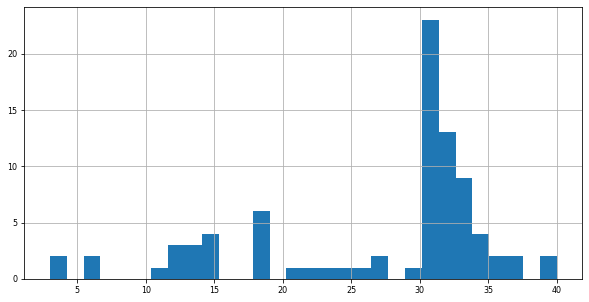

In [13]:
body_len.hist(figsize=(10, 5), bins=30, xlabelsize=8, ylabelsize=8)

In [14]:
import nltk                             
# from nltk.corpus import twitter_samples                            
# from nltk.corpus import stopwords 
# from nltk.stem import PorterStemmer
# from nltk.tokenize import TweetTokenizer  

import random  
import re                     
import string

# nltk.download('stopwords')

In [23]:
tweets = df_tw_sumas
tweets

,content
0,'ATRIK ZAMAN DARALDI GELİYORUZ. Mağdur mu oldu...
1,'ATRIK ZAMAN DARALDI GELİYORUZ. Kulaklarınız ç...
2,'ATRIK ZAMAN DARALDI GELİYORUZ. İtibar kolay b...
3,'ATRIK ZAMAN DARALDI GELİYORUZ. Biz bize gelen...
4,'ATRIK ZAMAN DARALDI GELİYORUZ. Biz bize gelen...
...,...
79,'Bilançosunu açıklayan borsa şirketleri https:...
80,'Tarama Listesi…trdrcptn…2\n#logo #maktk #mmca...
81,'Bugün bilanço açıklayan şirketler / hisseler:...
82,'#Borsa #SUMAS hissesi


In [24]:
def remove_special_character(tweet):
    # print(tweet)
    # remove the old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags. only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    # remove single numeric terms in the tweet. 
    tweet = re.sub(r'[0-9]', '', tweet)
    
    return tweet

In [25]:
tweets["tweet"] = tweets["content"].apply(lambda tweet: remove_special_character(tweet))

In [26]:
tweets["tweet"] = tweets["tweet"].str.lower()

In [27]:
tweets[["content", "tweet"]].sample(10)

,content,tweet
57,'#TIRE #THYAO #TEZOL #TEKTU #SUMAS değerlendir...,'tire thyao tezol tektu sumas değerlendirmemi ...
32,'ATRIK ZAMAN DARALDI GELİYORUZ. Çok iddialı bi...,'atrik zaman daraldi geli̇yoruz. çok iddialı b...
18,'ATRIK ZAMAN DARALDI GELİYORUZ. Kulaklarınız ç...,'atrik zaman daraldi geli̇yoruz. kulaklarınız ...
4,'ATRIK ZAMAN DARALDI GELİYORUZ. Biz bize gelen...,'atrik zaman daraldi geli̇yoruz. biz bize gele...
49,'#Borsa da bir #Hisse ancak doğru zamanda doğr...,'borsa da bir hisse ancak doğru zamanda doğru ...
23,'ATRIK ZAMAN DARALDI GELİYORUZ. Biz bize gelen...,'atrik zaman daraldi geli̇yoruz. biz bize gele...
59,'#Borsa da bir #Hisse ancak doğru zamanda doğr...,'borsa da bir hisse ancak doğru zamanda doğru ...
50,'#xu100 #bist100 #XU30 @xanthos_027 ağam gerçe...,'xu bist xu @xanthos_ ağam gerçek bir borsa oy...
60,'#Borsa da bir #Hisse ancak doğru zamanda doğr...,'borsa da bir hisse ancak doğru zamanda doğru ...
63,'Tarama Listesi/Tillson /ONAY/\n\n#akmgy #atat...,'tarama listesi/tillson /onay/\n\nakmgy atatp ...


In [28]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.2 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=111eccc55526b0e2ca8917fcbfcfca91162701ebdc496e5260aa4dc1c70f9105
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [29]:
from afinn import Afinn
afinn = Afinn()

In [31]:
tweets['afinn_score'] = tweets['tweet'].apply(lambda tweet: afinn.score(tweet))
tweets['afinn_score']

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
79    0.0
80    0.0
81    0.0
82    0.0
83    0.0
Name: afinn_score, Length: 84, dtype: float64